In [285]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [286]:
# Ford
## Texas Data
df_TX_1 = pd.read_csv('Ford_TX.csv')
df_TX_1['state'] = 'TX'
df_TX_2 = pd.read_csv('Ford_TX2.csv')
df_TX_2['state'] = 'TX'
df_TX_3 = pd.read_csv('Toyota_TX.csv')
df_TX_3['state'] = 'TX'
## NY Data
df_NY_1 = pd.read_csv('Ford_NY_1.csv')
df_NY_1['state'] = 'NY'
df_NY_2 = pd.read_csv('Ford_NY_2.csv')
df_NY_2['state'] = 'NY'
## California Data
df_CA = pd.read_csv('Ford_CA.csv')
df_CA['state']='CA'

### Merging/Cleaning all data 

In [287]:
df = pd.concat([df_TX_1,df_TX_2,df_TX_3,df_NY_1,df_NY_2,df_CA],axis=0).reset_index(drop=True)
df.shape

(2631, 14)

In [288]:
df.drop('Unnamed: 0', axis=1 , inplace=True)
df.head()

,car_mileage,car_price,car_mpg,car_model_year,car_model,car_make,car_color,car_transmission,car_engine_size,car_horse_power,car_engine_cylinder,car_msrp_price,state
0,93K miles,"$13,998*",['22/33 mpg'],2015,Fusion Titanium,Ford,Red,Automatic,2.0,240.0,4.0,30800.0,TX
1,115K miles,"$36,998*",['12/17 mpg'],2015,F250 XLT,Ford,Silver,Automatic,6.7,400.0,8.0,38300.0,TX
2,35K miles,"$20,998*",['19/27 mpg'],2018,Transit Connect XLT,Ford,Gray,Automatic,2.5,169.0,4.0,28000.0,TX
3,7K miles,N/A*,['22/28 mpg'],2017,Escape Titanium,Ford,Black,Automatic,1.5,179.0,4.0,31000.0,TX
4,44K miles,"$25,998*",['18/23 mpg'],2015,F150 XL,Ford,Red,Automatic,2.7,325.0,6.0,33600.0,TX


In [289]:
#Clean/Convert car_mileage to float number
df["car_mileage"] = df["car_mileage"].str.split("K").str[0].astype('float')*1000

In [290]:
# Clean/Convert car_price to float number
df['car_price'] = df['car_price'].str.replace("$","").str.replace("*","").str.replace(",","").str.replace("N/A",'0').astype('float')
#df_final = df_final[(df_final['car_price'] != 'N/A') | (df_final['car_price'] != 'NaN') | (df_final['car_price'] != np.nan)].astype('float')
df.loc[df['car_price']==0] = np.nan
df.shape

(2631, 13)

In [291]:
# dropping the null columns in car_prices
df = df[pd.notnull(df['car_price'])]
df.shape

(2376, 13)

In [292]:
# Separating the Car model and car make
df[['car_model','Trim']] = df['car_model'].str.split(" ",1,expand=True)

In [293]:
# Clean and separate city/highway MPG
df['car_mpg'] = df['car_mpg'].str.replace("[","").str.replace("'","").str.replace("]","").str.replace(" mpg","").str.replace('nan','0/0')
df[['City_MPG','Highway_MGP']] = df['car_mpg'].str.split("/",expand=True)
df.drop('car_mpg',axis=1,inplace=True)

In [294]:
# Creating two new columns
df['car_age'] = 2021 - df['car_model_year']
df['depreciation'] = df['car_msrp_price']-df['car_price']
df['depreciation_percent'] = 100*df['depreciation']/df['car_msrp_price']

In [295]:
df['car_model_year'] = df['car_model_year'].astype('int')

In [296]:
df.car_make.value_counts()

Ford      1901
Toyota     475
Name: car_make, dtype: int64

In [297]:
df.car_model_year.value_counts()

2017    494
2018    458
2019    346
2016    257
2015    201
2014    175
2013    156
2020    137
2012     67
2011     46
2010     27
2009     12
Name: car_model_year, dtype: int64

In [298]:
# Filtering the data based on dates after 2012
print(df.shape)
df = df[df['car_model_year']>2012]
print(df.shape)

(2376, 18)
(2224, 18)


In [299]:
#ax = df.groupby(['car_make','car_model_year']).depreciation_percent.mean().plot(c='k',ls='--');
#ax.set_title('Depreciataion percent',size=15,c='k');

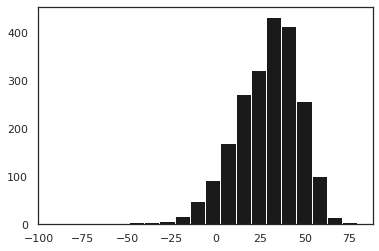

In [300]:
df['depreciation_percent'].hist(grid=False,color='k',bins=20);

Text(0, 0.5, 'Number of Cars')

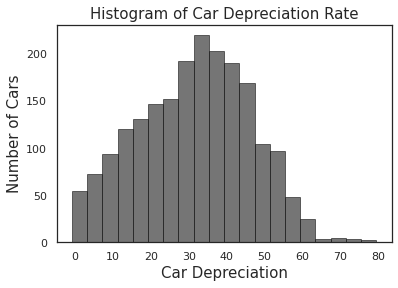

In [394]:
# Removing the data with depreciation less than -10
df = df[df['depreciation_percent']>-1]
ax = df['depreciation_percent'].hist(grid=False,color='k',bins=20,edgecolor="k",alpha=0.6);
ax.set_title('Histogram of Car Depreciation Rate',size=15)
ax.set_xlabel('Car Depreciation',size=15)
ax.set_ylabel('Number of Cars',size=15)

In [395]:
df[df.depreciation<-10]

,car_mileage,car_price,car_model_year,car_model,car_make,car_color,car_transmission,car_engine_size,car_horse_power,car_engine_cylinder,car_msrp_price,state,Trim,City_MPG,Highway_MGP,car_age,depreciation,depreciation_percent
63,68000.0,53998.0,2018,F150,Ford,White,Automatic,3.5,450.0,6.0,53700.0,TX,SVT Raptor,15,18,3.0,-298.0,-0.554935
79,4000.0,34998.0,2019,F150,Ford,White,Automatic,2.7,325.0,6.0,34700.0,TX,XLT,0,0,2.0,-298.0,-0.858790
360,23000.0,34998.0,2019,F150,Ford,Black,Automatic,5.0,NaN,NaN,34700.0,TX,XL,0,0,2.0,-298.0,-0.858790
493,10000.0,34998.0,2019,F150,Ford,Purple,Automatic,2.7,325.0,6.0,34700.0,TX,XL,0,0,2.0,-298.0,-0.858790
599,13000.0,35998.0,2020,Mustang,Ford,Black,Automatic,5.0,NaN,8.0,35700.0,TX,GT,0,0,1.0,-298.0,-0.834734
626,4000.0,34998.0,2019,F150,Ford,Gray,Automatic,2.7,325.0,6.0,34700.0,TX,XLT,0,0,2.0,-298.0,-0.858790
741,17000.0,34998.0,2019,F150,Ford,Blue,Automatic,2.7,325.0,6.0,34700.0,TX,XLT,0,0,2.0,-298.0,-0.858790
934,16000.0,29998.0,2017,Tacoma,Toyota,Gray,Automatic,3.5,278.0,6.0,29900.0,TX,SR5,19,24,4.0,-98.0,-0.327759
1098,74000.0,29998.0,2017,Tacoma,Toyota,White,Automatic,3.5,278.0,6.0,29900.0,TX,TRD Sport,19,24,4.0,-98.0,-0.327759
1141,23000.0,40998.0,2020,Tundra,Toyota,Silver,Automatic,5.7,NaN,8.0,40900.0,TX,SR5,0,0,1.0,-98.0,-0.239609


In [396]:
#df.plot('car_model_year',kind='bar')#.value_counts().sort_index()

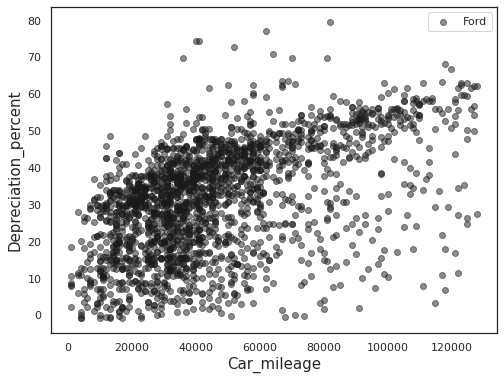

In [397]:
fig , ax = plt.subplots(figsize=(8,6))
ax.scatter(x=df.car_mileage,y=df.depreciation_percent,alpha=0.5,c='k',label='Ford');
ax.set_xlabel('Car_mileage',size=15);
ax.set_ylabel('Depreciation_percent',size=15);
ax.legend()

### Mileage

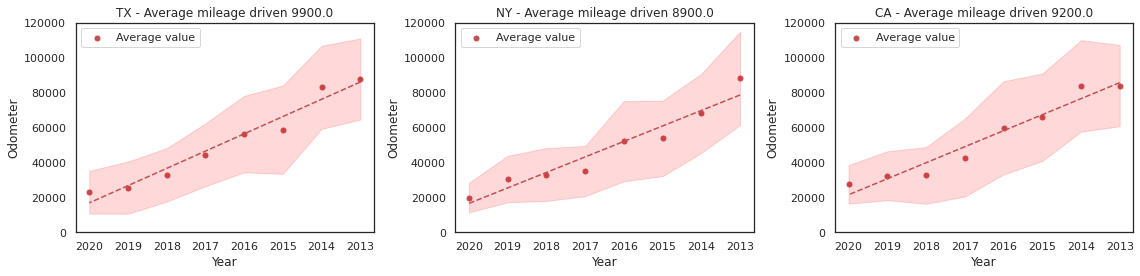

In [482]:
fig,axs = plt.subplots(1,3,figsize=(16,4))
text_size = 12

for i,state in enumerate(df.state.unique()):
    mean_mileage = df[df.state==state].groupby('car_model_year').car_mileage.mean()
    max_mileage = df[df.state==state].groupby('car_model_year').car_mileage.max()
    min_mileage = df[df.state==state].groupby('car_model_year').car_mileage.min()
    std_mileage = df[df.state==state].groupby('car_model_year').car_mileage.std()
    
    
    axs[i].set_xlabel('Year',size = text_size)
    axs[i].set_ylabel('Odometer',size = text_size)
    axs[i].scatter(mean_mileage.index,mean_mileage.values,color='r',label='Average value',edgecolor='r',s=25)
    axs[i].invert_xaxis()
    #axs[i].fill_between(mean_mileage.index, min_mileage.values, max_mileage.values, color='red',alpha=0.15)
    axs[i].fill_between(mean_mileage.index, mean_mileage.values-std_mileage.values, mean_mileage.values+std_mileage.values, color='red',alpha=0.15)
    axs[i].legend(loc='upper left')
    axs[i].set_ylim([0,120000])
    
    z = np.polyfit(mean_mileage.index, mean_mileage.values, 1)
    p = np.poly1d(z)
    axs[i].plot(mean_mileage.index,p(mean_mileage.index),"r--", label='Trendline')
    
    axs[i].set_title(state+' - '+f'Average mileage driven {round(-z[0],-2)}',size = text_size)
    
plt.tight_layout()

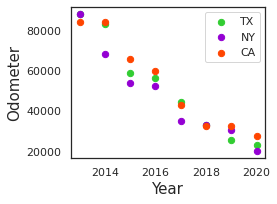

In [399]:
fig,ax = plt.subplots(figsize=(4,3))
text_size = 15
colors = ['limegreen','darkviolet','orangered']
for i,state in enumerate(df.state.unique()):
    mean_mileage = df[df.state==state].groupby('car_model_year').car_mileage.mean()
    ax.scatter(mean_mileage.index,mean_mileage.values,color=colors[i],label=state,s=40)
  
ax.set_xlabel('Year',size = text_size)
ax.set_ylabel('Odometer',size = text_size)
ax.legend(loc='upper right')   
plt.tight_layout()
# NOT REALLY USEFUL

### Depreciation

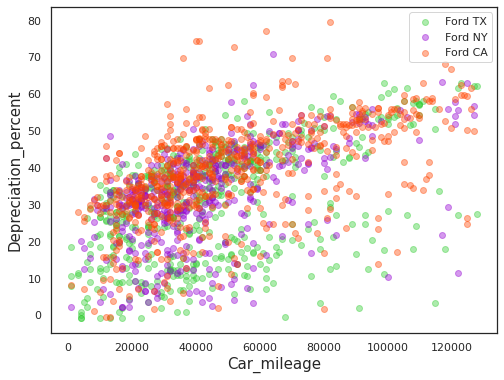

In [400]:
fig , ax = plt.subplots(figsize=(8,6))
colors = ['limegreen','darkviolet','orangered']

for i,state in enumerate(df.state.unique()):
    ax.scatter(x=df[(df.state==state) & (df.car_make=='Ford')].car_mileage,y=df[(df.state==state) & 
              (df.car_make=='Ford')].depreciation_percent,alpha=0.4,c=colors[i],label=f'Ford {state}');

ax.set_xlabel('Car_mileage',size=15);
ax.set_ylabel('Depreciation_percent',size=15);
ax.legend();

### Comparison of Toyota and Ford

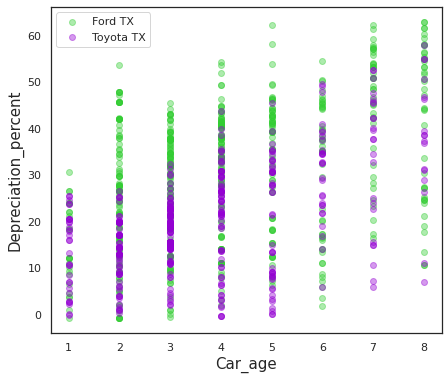

In [401]:
fig , ax = plt.subplots(figsize=(7,6))
colors = ['limegreen','darkviolet','orangered']

ax.scatter(x=df[(df.state=='TX') & (df.car_make=='Ford')].car_age,y=df[(df.state=='TX') & (df.car_make=='Ford')].depreciation_percent,alpha=0.4,c=colors[0],label=f'Ford TX');
ax.scatter(x=df[(df.state=='TX') & (df.car_make=='Toyota')].car_age,y=df[(df.state=='TX') & (df.car_make=='Toyota')].depreciation_percent,alpha=0.4,c=colors[1],label=f'Toyota TX');


ax.set_xlabel('Car_age',size=15);
ax.set_ylabel('Depreciation_percent',size=15);
ax.legend();

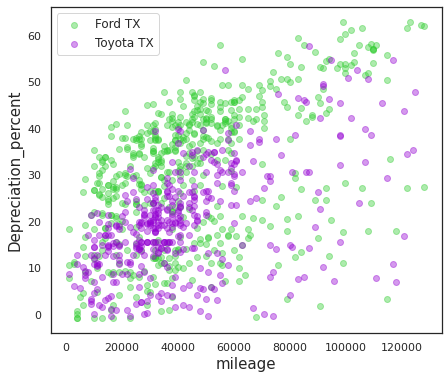

In [402]:
fig , ax = plt.subplots(figsize=(7,6))
colors = ['limegreen','darkviolet','orangered']

ax.scatter(x=df[(df.state=='TX') & (df.car_make=='Ford')].car_mileage,y=df[(df.state=='TX') & (df.car_make=='Ford')].depreciation_percent,alpha=0.4,c=colors[0],label=f'Ford TX');
ax.scatter(x=df[(df.state=='TX') & (df.car_make=='Toyota')].car_mileage,y=df[(df.state=='TX') & (df.car_make=='Toyota')].depreciation_percent,alpha=0.4,c=colors[1],label=f'Toyota TX');


ax.set_xlabel('mileage',size=15);
ax.set_ylabel('Depreciation_percent',size=15);
ax.legend(prop={'size': 12});

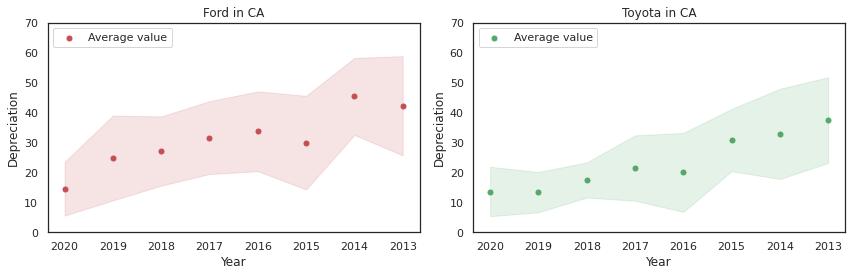

In [454]:
fig,axs = plt.subplots(1,2,figsize=(12,4))
colors=['r','g']
for i,car_brand in enumerate(['Ford','Toyota']):
    mean_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.mean()
    max_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.max()
    min_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.min()
    std_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.std()

    axs[i].set_title(car_brand +' in '+state,size = text_size)
    axs[i].set_xlabel('Year',size = text_size)
    axs[i].set_ylabel('Depreciation',size = text_size)
    axs[i].scatter(mean_dep.index,mean_dep.values,color=colors[i],label='Average value',edgecolor=colors[i],s=25)
    axs[i].invert_xaxis()
    #axs[i].fill_between(mean_mileage.index, min_mileage.values, max_mileage.values, color='red',alpha=0.15)
    axs[i].fill_between(mean_dep.index, mean_dep.values-std_dep.values, mean_dep.values+std_dep.values, color=colors[i],alpha=0.15)
    axs[i].legend(loc='upper left')
    axs[i].set_ylim([0,70])

plt.tight_layout()

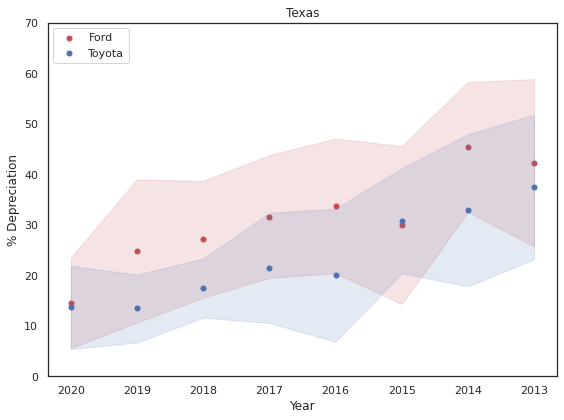

In [483]:
fig,axs = plt.subplots(figsize=(8,6))
colors=['r','b']
for i,car_brand in enumerate(['Ford','Toyota']):
    mean_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.mean()
    max_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.max()
    min_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.min()
    std_dep = df[(df.state=='TX')&(df.car_make==car_brand)].groupby('car_model_year').depreciation_percent.std()

    axs.set_title('Texas',size = text_size)
    axs.set_xlabel('Year',size = text_size)
    axs.set_ylabel('% Depreciation',size = text_size)
    axs.scatter(mean_dep.index,mean_dep.values,color=colors[i],label=car_brand,edgecolor=colors[i],s=25)
    
    #axs[i].fill_between(mean_mileage.index, min_mileage.values, max_mileage.values, color='red',alpha=0.15)
    axs.fill_between(mean_dep.index, mean_dep.values-std_dep.values, mean_dep.values+std_dep.values, color=colors[i],alpha=0.15)
    axs.legend(loc='upper left')
    axs.set_ylim([0,70])
axs.invert_xaxis()
plt.tight_layout()

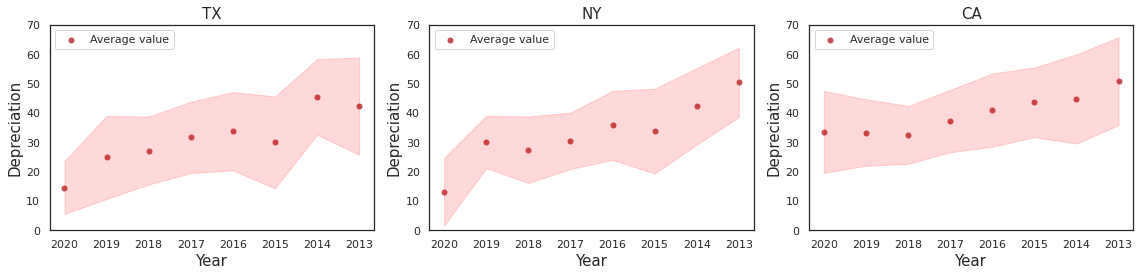

In [446]:
fig,axs = plt.subplots(1,3,figsize=(16,4))

for i,state in enumerate(df.state.unique()):
    mean_dep = df[(df.state==state)&(df.car_make=='Ford')].groupby('car_model_year').depreciation_percent.mean()
    max_dep = df[(df.state==state)&(df.car_make=='Ford')].groupby('car_model_year').depreciation_percent.max()
    min_dep = df[(df.state==state)&(df.car_make=='Ford')].groupby('car_model_year').depreciation_percent.min()
    std_dep = df[(df.state==state)&(df.car_make=='Ford')].groupby('car_model_year').depreciation_percent.std()

    axs[i].set_title(state,size = text_size)
    axs[i].set_xlabel('Year',size = text_size)
    axs[i].set_ylabel('Depreciation',size = text_size)
    axs[i].scatter(mean_dep.index,mean_dep.values,color='r',label='Average value',edgecolor='r',s=25)
    axs[i].invert_xaxis()
    #axs[i].fill_between(mean_mileage.index, min_mileage.values, max_mileage.values, color='red',alpha=0.15)
    axs[i].fill_between(mean_dep.index, mean_dep.values-std_dep.values, mean_dep.values+std_dep.values, color='red',alpha=0.15)
    axs[i].legend(loc='upper left')
    axs[i].set_ylim([0,70])

plt.tight_layout()

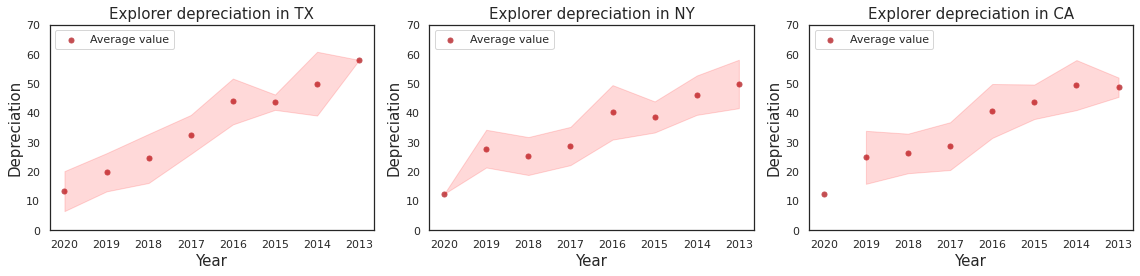

In [449]:
fig,axs = plt.subplots(1,3,figsize=(16,4))

filter_model = 'Explorer'
for i,state in enumerate(df.state.unique()):
    mean_dep = df[(df.state==state)&(df.car_model=='Explorer')].groupby('car_model_year').depreciation_percent.mean()
    max_dep = df[(df.state==state)&(df.car_model=='Explorer')].groupby('car_model_year').depreciation_percent.max()
    min_dep = df[(df.state==state)&(df.car_model=='Explorer')].groupby('car_model_year').depreciation_percent.min()
    std_dep = df[(df.state==state)&(df.car_model=='Explorer')].groupby('car_model_year').depreciation_percent.std()
    axs[i].set_title('Explorer depreciation in '+state,size = text_size)
    axs[i].set_xlabel('Year',size = text_size)
    axs[i].set_ylabel('Depreciation',size = text_size)
    axs[i].scatter(mean_dep.index,mean_dep.values,color='r',label='Average value',edgecolor='r',s=25)
    axs[i].invert_xaxis()
    #axs[i].fill_between(mean_mileage.index, min_mileage.values, max_mileage.values, color='red',alpha=0.15)
    axs[i].fill_between(mean_dep.index, mean_dep.values-std_dep.values, mean_dep.values+std_dep.values, color='red',alpha=0.15)
    axs[i].legend(loc='upper left')
    axs[i].set_ylim([0,70])

plt.tight_layout()

### Car Categoties

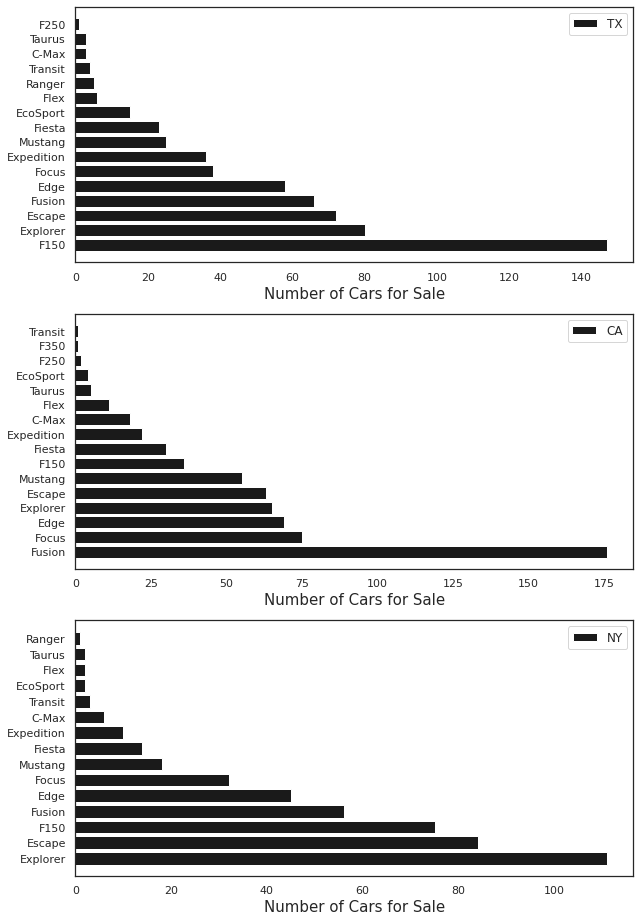

In [310]:
Ford_TX = df[(df.state=='TX')&(df.car_make=='Ford')].car_model.value_counts()
fig,axs = plt.subplots(3,1,figsize=(10,16))
axs[0].barh(y=Ford_TX.index,width=Ford_TX.values,label='TX',color='k')
axs[0].set_xlabel('Number of Cars for Sale',size=15);
axs[0].legend(prop={'size': 12});

Ford_CA = df[(df.state=='CA')&(df.car_make=='Ford')].car_model.value_counts()
axs[1].barh(y=Ford_CA.index,width=Ford_CA.values,label='CA',color='k')
axs[1].set_xlabel('Number of Cars for Sale',size=15);
axs[1].legend(prop={'size': 12});

Ford_NY = df[(df.state=='NY')&(df.car_make=='Ford')].car_model.value_counts()
axs[2].barh(y=Ford_NY.index,width=Ford_NY.values,label='NY',color='k')
axs[2].set_xlabel('Number of Cars for Sale',size=15);
axs[2].legend(prop={'size': 12});

In [311]:
# sns.set_theme(style="white")
# corr = df.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5});

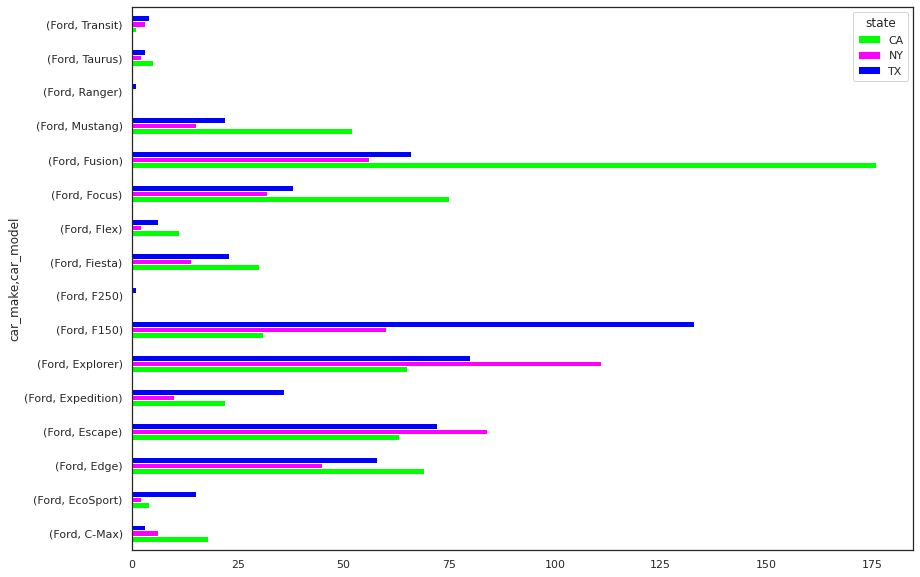

In [408]:
df2=df[df.car_make=='Ford']
df2.groupby(['state','car_make']).car_model.value_counts().unstack('state').plot.barh(figsize=(14,10),color=['lime','magenta','blue']);

In [337]:
#df[(df.state=='TX')&(df.car_model=='Explorer')].car_model_year.value_counts()

In [338]:
#df[(df.state=='NY')&(df.car_model=='Explorer')].car_model_year.value_counts()

In [339]:
#df[(df.state=='CA')&(df.car_model=='Explorer')].car_model_year.value_counts()

### Car Price Difference

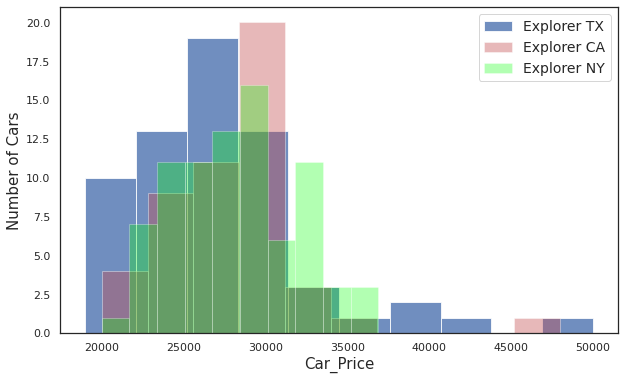

In [389]:
fig,ax = plt.subplots(figsize=(10,6))
Price_Explorer_TX2017 = df[(df.state=='TX')&(df.car_model=='Explorer')&(df.car_model_year>=2017)]
Price_Explorer_CA2017 = df[(df.state=='CA')&(df.car_model=='Explorer')&(df.car_model_year>=2017)]
Price_Explorer_NY2017 = df[(df.state=='NY')&(df.car_model=='Explorer')&(df.car_model_year>=2017)]
ax.hist(Price_Explorer_TX2017['car_price'],label='Explorer TX',color='b',alpha=0.8)
ax.hist(Price_Explorer_CA2017['car_price'],label='Explorer CA',color='r',alpha=0.4)
ax.hist(Price_Explorer_NY2017['car_price'],label='Explorer NY',color='lime',alpha=0.3)
ax.set_xlabel('Car_Price',size=15)
ax.set_ylabel('Number of Cars',size=15)
ax.legend(prop={'size': 14});
plt.savefig('Ali')

In [368]:
# BoxPlot

In [ ]:
ax = a1.boxplot(by='week_days', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=False, return_type='axes')
a2 = a[['CH4_sync','week_days']]
a2.boxplot(by='week_days', meanline=True, showmeans=True, showcaps=True, 
           showbox=True, showfliers=False, ax=ax)

### Color

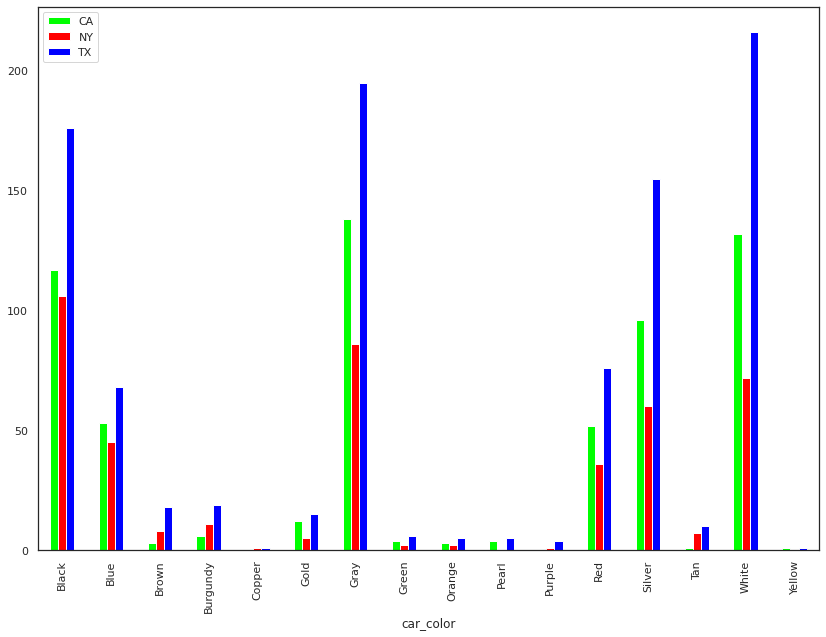

In [495]:
ax = df.groupby(['state']).car_color.value_counts().unstack('state').plot.bar(figsize=(14,10),color=['lime','red','blue']);
ax.legend(loc='upper left')

In [492]:
df[df.state=='TX'].car_color.value_counts()

White       216
Gray        195
Black       176
Silver      155
Red          76
Blue         68
Burgundy     19
Brown        18
Gold         15
Tan          10
Green         6
Pearl         5
Orange        5
Purple        4
Copper        1
Yellow        1
Name: car_color, dtype: int64

In [493]:
df[df.state=='CA'].car_color.value_counts()

Gray        138
White       132
Black       117
Silver       96
Blue         53
Red          52
Gold         12
Burgundy      6
Green         4
Pearl         4
Brown         3
Orange        3
Yellow        1
Tan           1
Name: car_color, dtype: int64

In [494]:
pltdf[df.state=='NY'].car_color.value_counts()

Black       106
Gray         86
White        72
Silver       60
Blue         45
Red          36
Burgundy     11
Brown         8
Tan           7
Gold          5
Green         2
Orange        2
Purple        1
Copper        1
Name: car_color, dtype: int64

(array([231., 195., 244., 216.,  34.,  18.,  11.,  10.,   5.,   6.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

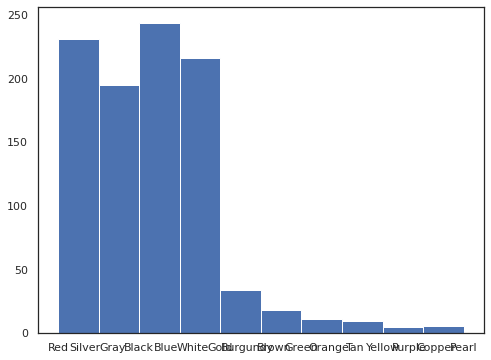

In [497]:
# Black, gray, White, and Silver
fig,ax = plt.subplots(figsize=(8,6))
ax.hist(df[(df.state=='TX')].car_color)

In [ ]:
ax.hist(Price_Explorer_TX2017['car_price'],label='Explorer TX',color='b',alpha=0.8)